### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means.  What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.<br>


The standard error of the mean represents the variation between the means of different samples and tells us how close a sample's mean is to the overall mean. The more samples there are, the smaller the error and the more accurate the results. The standard deviation, on the other hand, is used to describe the fluctuations in the data itself, telling us how far from the mean the data points are. Simply put, the standard error is used to measure how well we can get a handle on the mean, and the standard deviation is used to measure how dispersed the data is.

### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this.  How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.<br>

To create a 95% confidence interval for the overall mean, first calculate the sample mean, then divide the sample standard deviation by the square root of the sample size to get the standard error (SEM). Next, multiply the SEM by the 95% confidence level threshold (usually 1.96) to get the margin of error. Finally, the margin of error is added or subtracted from the sample mean to obtain the confidence interval, which indicates that there is a 95% probability that this interval contains the overall mean. Multiple sample means were obtained by repeated sampling and confidence intervals were calculated in the same way.

### **Session Summary**

**1. Understanding Standard Deviation (SD) vs. Standard Error of the Mean (SEM):**

- **Standard Deviation (SD):**
  - **Definition:** Measures the variability or spread of individual data points around the sample mean.
  - **Interpretation:** A higher SD indicates more spread out data, while a lower SD signifies data points are closer to the mean.
  - **Usage:** Describes the dispersion within the actual dataset, applicable to both population and sample data.

- **Standard Error of the Mean (SEM):**
  - **Definition:** Measures the precision of the sample mean as an estimate of the population mean.
  - **Calculation:** \( SEM = \frac{SD}{\sqrt{n}} \), where \( n \) is the sample size.
  - **Interpretation:** A smaller SEM suggests the sample mean is a more accurate estimate of the population mean. SEM decreases as sample size increases.
  - **Usage:** Useful for constructing confidence intervals and conducting hypothesis tests related to the mean.

**2. Creating a 95% Confidence Interval Using SEM and Bootstrap Methods:**

- **Using SEM:**
  1. **Calculate the Sample Mean (\( \bar{x} \))**: Determine the average of your sample data.
  2. **Compute SEM**: \( SEM = \frac{SD}{\sqrt{n}} \).
  3. **Determine Critical Value**: For a 95% confidence level, use \( Z = 1.96 \) (from the standard normal distribution) or the appropriate t-value if the sample size is small.
  4. **Calculate Margin of Error (MOE)**: \( MOE = Z \times SEM \).
  5. **Construct Confidence Interval (CI)**: \( CI = (\bar{x} - MOE, \bar{x} + MOE) \).

- **Using Bootstrap Methods:**
  1. **Resample Data**: Generate a large number of bootstrap samples (e.g., 10,000) by repeatedly sampling with replacement from the original dataset.
  2. **Calculate Means**: Compute the mean of each bootstrap sample to create a distribution of bootstrap means.
  3. **Compute Bootstrap SEM**: Calculate the standard deviation of the bootstrap means.
  4. **Determine Confidence Interval**: Apply the SEM-based method using the bootstrap SEM to establish the 95% confidence interval, ensuring it encompasses approximately 95% of the bootstrap sample means.

**3. Key Takeaways:**

- **SD vs. SEM:** SD quantifies the variability within the data, whereas SEM quantifies the uncertainty in estimating the population mean from the sample mean.
- **Confidence Intervals:** SEM is instrumental in constructing confidence intervals, providing a range that likely contains the true population mean with a specified level of confidence (e.g., 95%).
- **Bootstrap Applications:** Bootstrap methods enhance the estimation of confidence intervals by empirically deriving the sampling distribution of the mean, offering robustness especially with smaller sample sizes or non-normal data distributions.

---

This summary encapsulates the discussion on differentiating SD and SEM and the methodology for constructing a 95% confidence interval using SEM, including both traditional and bootstrap approaches.

https://chatgpt.com/share/66fd918f-966c-8008-938e-4b454b80c6c8

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.<br>

The bootstrap method is used to estimate the 95% confidence interval for the mean of this sample. The basic idea of the bootstrap method is to generate multiple bootstrap samples by sampling from the original sample with putbacks.

I calculate the mean of each bootstrap sample to get a final set of bootstrap means. I create an array bootstrap_means of size num_bootstrap_samples (i.e. 1000) to store the means obtained from each bootstrap sample.

np.random.choice(data, size=len(data), replace=True): each bootstrap performs a putative random sample from the original data, meaning that the same data point can appear multiple times in a bootstrap sample. The purpose of this is to simulate the process of repeated sampling from the population.

np.mean(bootstrap_sample): for each bootstrap sample, we compute the mean and store it in the bootstrap_means array.

Use the np.quantile() function to find the 2.5% and 97.5% quantiles of the bootstrap mean distribution. These quantiles serve as the lower and upper 95% confidence intervals.


### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).<br>


In [2]:
import pandas as pd 
import numpy as np

# Define a function to calculate bootstrap confidence intervals
def bootstrap_confidence_interval(data, statistic_function, num_samples=1000, ci=95):
    """
    data: Input data array
    statistic_function: Function to compute the statistic (e.g., mean, median)
    num_samples: Number of bootstrap samples, default is 1000
    ci: Confidence interval percentage, default is 95%
    """
    # Generate bootstrap samples and calculate the statistic for each sample
    bootstrap_samples = np.random.choice(data, (num_samples, len(data)), replace=True)
    stat_values = np.apply_along_axis(statistic_function, 1, bootstrap_samples)
    
    # Calculate the lower and upper bounds of the confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound, upper_bound = np.quantile(stat_values, [lower_percentile / 100, upper_percentile / 100])
    
    return lower_bound, upper_bound

# Load a sample dataset
url = "https://raw.githubusercontent.com/ageron/data/main/housing/housing.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset to inspect its structure
print(data.head())

# Extract the 'median_house_value' column and remove missing values
values = data['median_house_value'].dropna().values

# Calculate the 95% bootstrap confidence interval for the mean
mean_ci_lower, mean_ci_upper = bootstrap_confidence_interval(values, np.mean, num_samples=1000, ci=95)

# Print the confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the Mean: [{mean_ci_lower}, {mean_ci_upper}]")

# To calculate confidence intervals for other statistics, replace 'np.mean' with other functions such as 'np.median' or 'np.var'.


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
95% Bootstrap Confidence Interval for the Mean: [205381.29474927328, 208411

In this session, you requested a Python code that demonstrates how to generate a 95% bootstrap confidence interval for the overall mean of a dataset. I provided you with a code that asks for a dataset URL and calculates the confidence interval for the mean, with clear comments on how you can modify the code to compute confidence intervals for other parameters (like median or variance) by simply changing the statistical function passed to the bootstrap function.

After that, you asked to include a specific dataset URL in the code as an example. I incorporated an open-source dataset (housing prices dataset from GitHub) to demonstrate the use of a fixed URL, and adjusted the code to load the dataset and calculate the bootstrap confidence interval for a specific column.

This summary includes:
- A well-commented code template for calculating bootstrap confidence intervals.
- Flexibility for calculating other statistics (mean, median, variance).
- Example of loading a dataset from a URL and processing it.

https://chatgpt.com/share/66fdc516-36f4-8008-86a6-6f3e80886e38

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.<br>

I need to distinguish between overall parameters and sample statistics because they play different roles in inference. An overall parameter is like a target that I really want to know, such as the average height of a certain group of people or the overall effectiveness of a certain vaccine, but I usually can't know these values directly because it's impossible for me to collect data from every person or every case.

Sample statistics are calculated by me after taking a portion of the sample from the overall population, such as calculating the average height of a small group of people or the effectiveness of a vaccine from them. These sample statistics can only be used as an estimate of the overall parameter because different samples will give different results, which is called sampling error.

Confidence intervals help me with this. It gives me a range through the sample statistics and tells me that based on this sample result, I am confident that the overall parameter will fall within that range.” The confidence interval allows me to realize that although I'm using the sample statistic to estimate the overall parameter, that estimate is not 100% accurate, but has some uncertainty. So, confidence intervals allow me to still make reasonable inferences in the face of this uncertainty.

We distinguish between population parameters and sample statistics in confidence intervals because:

Population parameters are fixed but unknown, describing the entire population.
Sample statistics are calculated from a sample and used to estimate the population parameters.
Confidence intervals provide a range of plausible values for the population parameter, accounting for sampling variability and uncertainty in the estimate derived from the sample statistic. The interval helps make inferences about the population based on the sample data.

https://chatgpt.com/share/66ff1f80-8090-8008-95e9-cedf22a24947

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. <br>

1. What is the process of bootstrapping? 
2. What is the main purpose of bootstrapping? 
3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1.The bootstrapping process is actually a statistical method used to estimate the accuracy of certain statistics in a data set. Simply put, let's say we have a sample set of data, but we don't know what it really is. So, we create many new “virtual” samples by repeatedly randomly selecting from this set of sample data. We can then run calculations on these new samples to see what the results look like and to estimate the range of variation or uncertainty in the data. If you have a bag full of beans, and you grab a handful of beans from it, and you want to know the average number of beans in the whole bag, you can take a handful of beans from the bag. This is where I can grab from this handful of beans multiple times over, simulate multiple possible outcomes, and eventually get a rough idea of how reliably the bean situation in the first grab represents the entire bag.

2.The main purpose of bootstrapping is to assess uncertainty. That is, when we calculate statistics such as mean, median, variance, etc. from a sample, we want to know how “stable” these results are. With bootstrapping, we can create a large number of dummy samples to see the range of these statistics in different contexts, and then estimate the confidence intervals for the statistic to determine its range of fluctuation. For example, if you take a quiz and get a score, but if you take it a few more times, will the results be very different. The bootstrapping method is like predicting the range of possible fluctuations in scores without going back to the test.

3.If I have a hypothesis about some overall mean, for example, I guess that the average height of the inhabitants of a certain city is 170 centimeters, and at the same time I have in my hand a sample of 50 randomly selected people's height data from that city. Then I can use bootstrapping to assess whether this assumption of mine is reasonable.

Specifically, I would do this:

1. hypothesis testing: first, I assume that my guess is correct, i.e. the average height of the city dwellers is indeed 170 cm.

2. Resampling: Next, I use bootstrapping to repeatedly resample from this sample of 50 individuals with put-backs. In other words, I randomly draw people from the sample of 50, and each time I get the same people, and this is repeated over and over again to form multiple “dummy” samples. I might do this resampling 1000 times. 

3. Calculate the mean distribution: I then calculate the mean height of each dummy sample, and eventually I get the mean of 1000 dummy samples, which forms a distribution.

4. comparing my guesses: finally, I will check if my guess (170 cm) falls within the mean distribution of these dummy samples. If my guess value is in or near the middle of this distribution, it means that my guess is probably reasonable; however, if my guess value is far from this distribution, or not within it at all, it means that my guess is probably incorrect and needs to be reconsidered.

By going through this process, I can assess whether my guess of the overall mean is consistent with the data. The bootstrapping method allows me to see how these averages might change if I had more samples to determine if my assumptions are reasonable.


### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is **[on average]** not doing anything".  This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect **[on average]**".  Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.<br>

In the hypothesis test, the null hypothesis (𝐻0:𝜇=0) indicates that the overall mean μ is 0, i.e., there is no average effect of the drug on health scores. The alternative hypothesis (HA), on the other hand, assumes that the null hypothesis is false, i.e., 𝜇 ≠ 0, and that medication has a significant effect on health scores. When we construct a confidence interval, it reflects the variability around the sample mean. If the confidence interval contains 0, it means that the sample data cannot rule out the possibility that 𝜇 = 0, and therefore there is not enough evidence to reject the null hypothesis 𝐻0, suggesting that the medication may not have a significant effect. Conversely, if the confidence interval does not contain 0, it means that the sample mean is significantly different from 0, supporting the 𝐻𝐴 hypothesis, suggesting that the drug has a significant effect on health. In this case, we can reject the null hypothesis 𝐻𝐴 and argue that the medication has an effect on the overall health score.

### 8. Complete the following assignment. 

### Vaccine Data Analysis Assignment

**Overview**

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective. 

**Data**
AliTech has released the following data.

```csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
```

**Deliverables**
While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are  primarily interested in evaluating your report relative to the following deliverables.

- A visual presentation giving some initial insight into the comparison of interest.
- A quantitative analysis of the data and an explanation of the method and purpose of this method.
- A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
- The clarity of your documentation, code, and written report. 

> Consider organizing your report within the following outline template.
> - Problem Introduction 
>     - An explaination of the meaning of a Null Hypothesis of "no effect" in this context
>     - Data Visualization (motivating and illustrating the comparison of interest)
> - Quantitative Analysis
>     - Methodology Code and Explanations
>     - Supporting Visualizations
> - Findings and Discussion
>     - Conclusion regarding a Null Hypothesis of "no effect"
>     - Further Considerations

**Further Instructions**
- When using random functions, you should make your analysis reproducible by using the `np.random.seed()` function
- Create a CSV file and read that file in with your code, but **do not** include the CSV file along with your submission


Null hypothesis (H0): the vaccine has no effect on health scores, i.e., the overall mean μ = 0 and the mean difference between the initial and final values of health scores is 0.

Alternative hypothesis (HA): the vaccine has an effect on the health scores, i.e. the overall mean μ ≠ 0 and the mean difference between the initial and final values of the health scores is significantly different from zero.

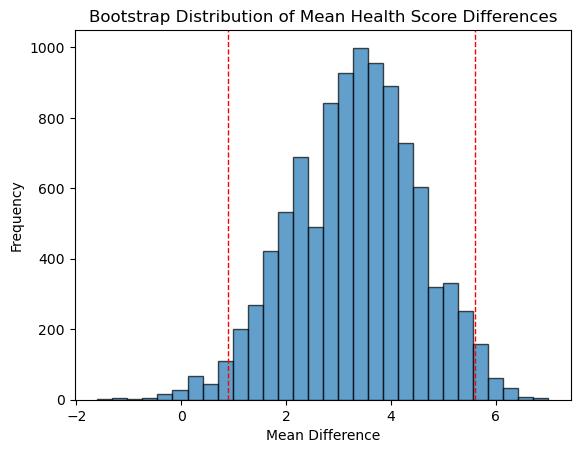

95% Confidence Interval: [0.9, 5.6]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Create the dataset directly within the code
data_dict = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the dictionary into a DataFrame
data = pd.DataFrame(data_dict)

# Calculate the difference between final and initial health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrap function to compute the mean difference
def bootstrap_mean_diff(data, n_bootstrap=10000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = data['HealthScoreDifference'].sample(frac=1, replace=True)
        bootstrap_means.append(sample.mean())
    return np.array(bootstrap_means)

# Perform bootstrapping
bootstrap_means = bootstrap_mean_diff(data)

# Calculate confidence interval (e.g., 95%)
ci_lower, ci_upper = np.quantile(bootstrap_means, [0.025, 0.975])

# Plot the bootstrap distribution
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=1)
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=1)
plt.title('Bootstrap Distribution of Mean Health Score Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.show()

# Output results
print(f'95% Confidence Interval: [{ci_lower}, {ci_upper}]')


### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

During the learning process, I've found that it's more effective to use different resources in tandem. For example, when I encounter something I don't understand, I usually use ChatBot first, because it can give me some feedback and explanation immediately, which is quite convenient. If the answers ChatBot gives aren't enough, I'll go to Piazza to see what people are discussing. The combination of these methods allows me to grasp the content of the course in a more comprehensive way.